In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

## Loading Random Sin Waves with stimuli 
This is just from the sin Function _v2
Note this is also using tau of length 10800
    st = -120*30
    en = 120*60
    tp = np.arange(st,en)/120


In [2]:
with open('data/LDS_response_RandsinFunc.pickle', 'rb') as f:
    pickle = pickle.load(f)

#print(pickle)
print(pickle.keys())


dict_keys(['tau', '061923achat_30m_Randsine051523Period', '061923bchat_30m_Randsine051523Period', '051623WT_30m_Randsine051523Period', '080423WT_30m_5x2.1m+cont2.3Period', '092523WT_30m_5x2.1m+cont2.5Period', '080723WT_30m_5x2.1m+cont2.3Period', '081823WT_30m_5x2.1m+cont2.5Period', '081123WT_30m_5x2.1m+cont2.5Period'])


# Random Sine Function

In [ ]:
# Either by adding in random periods from the arduino code or denovo testing random periods

In [25]:
from tools.bootstrapTest import bootstrap_traces# bootstrapTest, bootstrap, timeDependentDifference

name = '081123WT_30m_5x2.1m+cont2.5Period'
# name = '061923bchat_30m_Randsine051523Period', '061923achat_30m_Randsine051523Period'
# name = '051623WT_30m_Randsine051523Period'
# name = '080423WT_30m_5x2.1m+cont2.3Period', '092523WT_30m_5x2.1m+cont2.5Period', '080723WT_30m_5x2.1m+cont2.3Period', '081823WT_30m_5x2.1m+cont2.5Period', '081123WT_30m_5x2.1m+cont2.5Period'


tau = pickle['tau'] #this is the first key in the dictionary showing the time frame
data = pickle[name]['data'] #each following key the experiment has two dict, 'data' which is the activity'
stim = pickle[name]['stim'] #the second dict, 'stim' which is the stimulation'

len(tau)


10800

In [26]:
#This is for making a random sine wave to test the function

# Given list of period durations in minutes made 051523
#stim_list = [4.4, 3.6, 4.4, 3.6, 3.2, 5.0, 3.0, 4.3, 4.5, 2.5, 5.7, 2.8, 3.7, 3.0, 4.1, 5.1, 5.4, 3.8, 4.6, 4.7, 2.8, 2.6, 3.7, 5.3, 3.9, 3.2, 3.8, 3.6, 3.4, 5.9, 4.6, 4.9, 4.3, 2.3, 2.2, 3.0, 2.8, 2.9, 2.2, 3.5, 2.6, 5.1, 3.1, 4.0, 4.1, 4.7, 4.7, 4.9, 4.3, 3.1]
stim_list = [2.1, 2.1, 2.1, 2.1, 2.1, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, ]
#stim_list = [2.1, 2.1, 2.1, 2.1, 2.1, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, ]


# Initialize your stimulus array to be the same size as tau, filled with zeros
new_stim = np.zeros_like(tau)

# Determine the start and end indices for the stimulation
start_index = np.where(tau == 0)[0][0]
end_stimulus = np.where(tau == 30)[0][0]  # the index where tau is 30

# Generate sine waves with random frequencies, stopping after 30 minutes
for s in stim_list:
    # Calculate the period of the sine wave with this frequency (in minutes)
    period = s
    
    # Convert period from minutes to number of steps
    period_steps = int(period * 120)
    
    # Calculate the end index for this frequency
    end_index = start_index + period_steps
    
    # Make sure we don't go past the end of the stimulus time
    if end_index > end_stimulus:
        end_index = end_stimulus
    
    # Generate the sine wave for this frequency, shifted by +π/2 to start at maximum
    t_values = tau[start_index:end_index]
    freq = 1 / period
    new_stim[start_index:end_index] = 0.5 + 0.5 * np.sin(2 * np.pi * freq * (t_values - tau[start_index]) )

    # Update start_index for the next frequency
    start_index = end_index
    
    # If we've reached the end of the stimulus time, break the loop
    if start_index >= end_stimulus:
        break

# Print part of the new stimuli
#print(new_stim[3600:4500])
print(len(new_stim)) 



10800


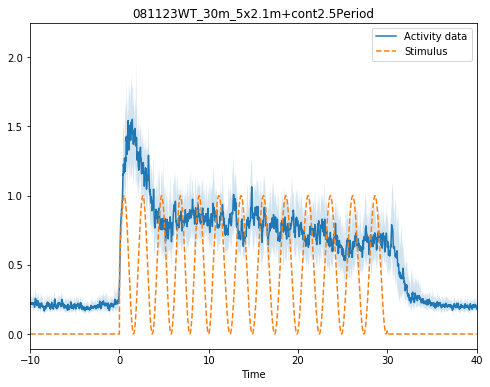

In [29]:
# Create a new figure with specified size
plt.figure(figsize=(8, 6))

# Assuming data is a 2D array, you might want to plot the mean of data (or any other aggregation)
n_boot = 1e3
statistic = np.median


y,rng = bootstrap_traces(data,n_boot=n_boot,statistic=statistic,conf_interval=99)
plt.plot(tau, y, label='Activity data')
plt.fill_between(tau,*rng,alpha=.2)
# data_mean = data.mean(axis=0)
# plt.plot(tau, data_mean, label='Activity data')

# Plot the new stimulus
plt.plot(tau, new_stim, label='Stimulus', linestyle='--')
plt.title('081123WT_30m_5x2.1m+cont2.5Period')
plt.xlabel('Time')
plt.legend()

# Set x-axis limits
plt.xlim(-10, 40)

# Save the plot
plt.savefig('052323_plots/081123WT_30m_5x2.1m+cont2.5Period.svg')


#NonRandom SineWaves


10800

In [64]:
def generate_stimulation_pattern(tau, first_duration=2.1, first_count=5, second_duration=2.5, total_duration=31):
    new_stim = np.zeros_like(tau)
    start_index = np.where(tau == 0)[0][0]
    end_stimulus = np.where(tau >= total_duration)[0][0]

    stim_list = [first_duration] * first_count
    while sum(stim_list) + second_duration <= total_duration:
        stim_list.append(second_duration)

    for s in stim_list:
        period = s
        period_steps = int(period * 120) 
        end_index = start_index + period_steps
        if end_index > end_stimulus:
            end_index = end_stimulus

        t_values = tau[start_index:end_index]
        freq = 1 / period
        new_stim[start_index:end_index] = 0.5 + 0.5 * np.sin(2 * np.pi * freq * (t_values - tau[start_index]))
        start_index = end_index
        if start_index >= end_stimulus:
            break

    return new_stim

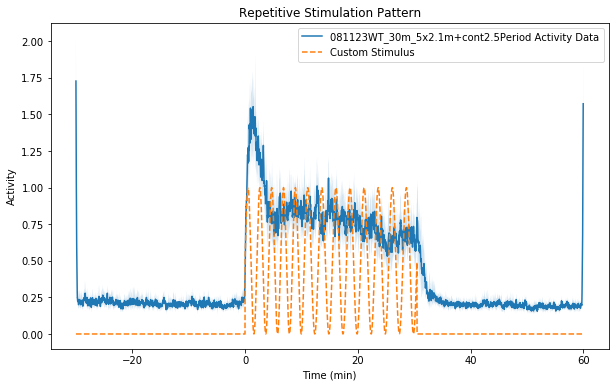

In [67]:

import pickle 
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype']='none'
from tools.bootstrapTest import bootstrap_traces
from tools.results import data_of_interest
from tools.results_step import rnai_response_layered

def custom_layered(interest_list,pickle_data,n_boot=1e3,statistic=np.median,conf_interval=95):
    fig, ax = plt.subplots(figsize=(10,6))

    for experiment in interest_list:
        if experiment in pickle_data:
            experiment_data = pickle_data[experiment]['data']
            y, rng = bootstrap_traces(experiment_data, n_boot=n_boot, statistic=statistic, conf_interval=conf_interval)

            ax.plot(pickle_data['tau'], y, label=f'{experiment} Activity Data')
            ax.fill_between(pickle_data['tau'], *rng, alpha=0.2)

    # Generate the custom stimulation pattern
    custom_stimulation_pattern = generate_stimulation_pattern(pickle_data['tau'])

    # Overlay the custom stimulation pattern
    ax.plot(pickle_data['tau'], custom_stimulation_pattern, label='Custom Stimulus', linestyle='--')
    ax.set_title('Repetitive Stimulation Pattern')
    ax.set_xlabel('Time (min)')
    ax.set_ylabel('Activity')
    ax.legend()

    return fig, ax

# Load the pickle data
with open('data/LDS_response_RandsinFunc.pickle', 'rb') as f:
    pickle_data = pickle.load(f)

# Define your experiments of interest
experiment_names = [ '081123WT_30m_5x2.1m+cont2.5Period',]  # Replace with actual names

#'092523WT_30m_5x2.1m+cont2.5Period', '080723WT_30m_5x2.1m+cont2.3Period', '081823WT_30m_5x2.1m+cont2.5Period', '081123WT_30m_5x2.1m+cont2.5Period'
# Call the custom_experiment_layered function with your parameters
fig, ax = custom_layered(experiment_names, pickle_data)
plt.show()


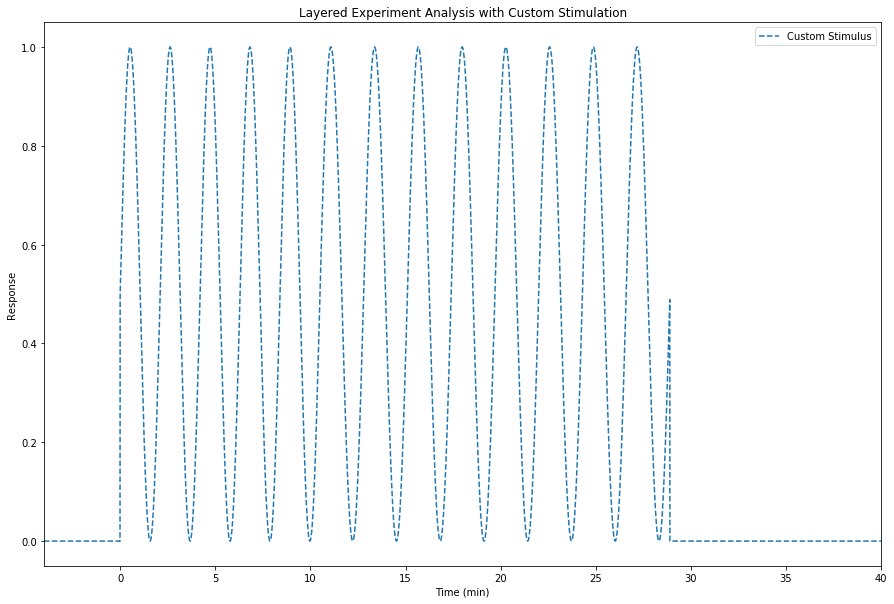

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

# Assuming bootstrap_traces and other necessary functions are defined
def custom_response_layered(interest_list, pickle_data, n_boot=1e3, statistic=np.median, conf_interval=95, powers=[64]):
    fig, ax = plt.subplots(figsize=(15, 10))

    for power in powers:
        # Process data for each power level (if applicable)
        for interest in interest_list:
            # Assuming a function 'data_of_interest' to filter data
            to_plot = data_of_interest(pickle_data.keys(), [f'{interest}_30m2h{power}bp'], exclude)

            # Process and plot data for each experiment
            for experiment in to_plot:
                if experiment in pickle_data:
                    experiment_data = pickle_data[experiment]
                    y, rng = bootstrap_traces(experiment_data, n_boot=n_boot, statistic=statistic, conf_interval=conf_interval)
                    
                    # Plotting the data for each experiment
                    ax.plot(pickle_data['tau'], y, label=f'{interest} ({len(experiment_data)})', lw=1, zorder=-1)
                    ax.fill_between(pickle_data['tau'], *rng, alpha=0.1, zorder=-2)
                    # Add additional statistical tests and visualizations as needed

        # Generate the custom stimulation pattern
        custom_stimulation_pattern = generate_stimulation_pattern(pickle_data['tau'])

        # Overlay the custom stimulation pattern
        ax.plot(pickle_data['tau'], custom_stimulation_pattern, label='Custom Stimulus', linestyle='--')

    ax.set_title('Layered Experiment Analysis with Custom Stimulation')
    ax.set_xlabel('Time (min)')
    ax.set_ylabel('Response')
    ax.legend()
    ax.set_xlim(-4, 40)
    return fig, ax

# Load the pickle data
with open('data/LDS_response_RandsinFunc.pickle', 'rb') as f:
    pickle_data = pickle.load(f)

# Define your experiments of interest
experiment_names = ['080423WT_30m_5x2.1m+cont2.3Period', '080723WT_30m_5x2.1m+cont2.3Period',]  # Replace with actual names

# Call the custom_response_layered function with your parameters
fig, ax = custom_response_layered(experiment_names, pickle_data)
plt.show()

Experiment Experiment1 not found in pickle_data
Experiment Experiment2 not found in pickle_data
Experiment Experiment3 not found in pickle_data


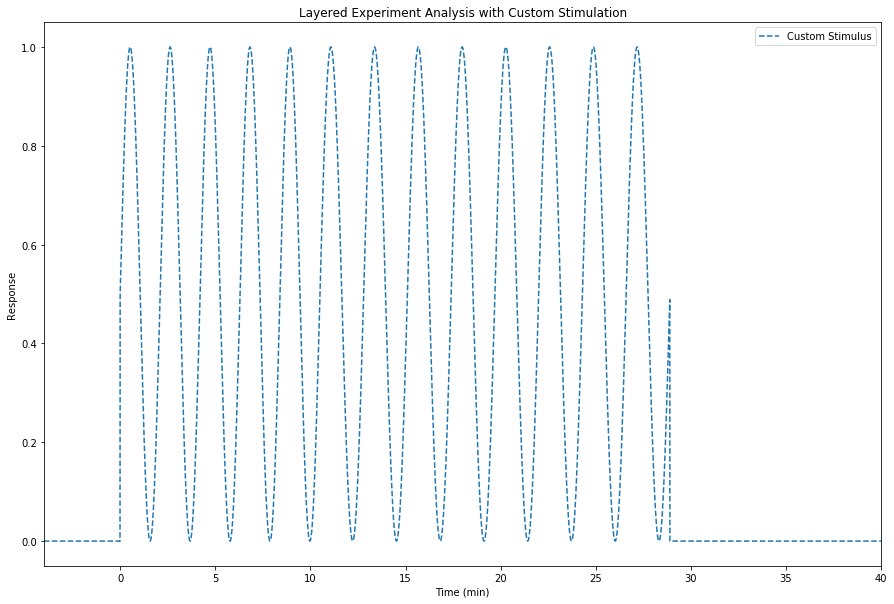

In [61]:
def custom_response_layered(interest_list, pickle_data, n_boot=1e3, statistic=np.median, conf_interval=95):
    fig, ax = plt.subplots(figsize=(15, 10))

    for interest in interest_list:
        if interest in pickle_data:
            experiment_data = pickle_data[interest]['data']
            y, rng = bootstrap_traces(experiment_data, n_boot=n_boot, statistic=statistic, conf_interval=conf_interval)
            
            ax.plot(pickle_data['tau'], y, label=f'{interest} Activity Data', lw=1, zorder=-1)
            ax.fill_between(pickle_data['tau'], *rng, alpha=0.1, zorder=-2)
        else:
            print(f"Experiment {interest} not found in pickle_data")  # Debugging

    # Generate the custom stimulation pattern
    custom_stimulation_pattern = generate_stimulation_pattern(pickle_data['tau'])

    # Overlay the custom stimulation pattern
    ax.plot(pickle_data['tau'], custom_stimulation_pattern, label='Custom Stimulus', linestyle='--')
    ax.set_title('Layered Experiment Analysis with Custom Stimulation')
    ax.set_xlabel('Time (min)')
    ax.set_ylabel('Response')
    ax.legend()
    ax.set_xlim(-4, 40)
    return fig, ax

# Load the pickle data
with open('data/LDS_response_RandsinFunc.pickle', 'rb') as f:
    pickle_data = pickle.load(f)

# Define your experiments of interest
experiment_names = ['Experiment1', 'Experiment2', 'Experiment3']  # Replace with actual names

# Call the custom_response_layered function with your parameters
fig, ax = custom_response_layered(experiment_names, pickle_data)
plt.show()

# If you want to plot any Random stimuli between 2-6m

In [ ]:
#This is for generating any random sine wave to test the function, to see how a random sine wave that wqasnt actually the data follows the activity

# Extract data
name = '061923achat_30m_Randsine051523Period'

tau = pickle['tau'] #this is the first key in the dictionary showing the time frame
data = pickle[name]['data'] #each following key the experiment has two dict, 'data' which is the activity'
stim = pickle[name]['stim'] #the second dict, 'stim' which is the stimulation'


# Set the limits of the period in minutes
period_upper_limit = 6
period_lower_limit = 2

# Convert period limits into frequency limits
frequency_upper_limit = 1 / period_lower_limit  # cycles/minute
frequency_lower_limit = 1 / period_upper_limit  # cycles/minute

# Generate a list of random frequencies
random_frequencies = np.random.uniform(frequency_lower_limit, frequency_upper_limit, size=100)

# Initialize your stimulus array to be the same size as tau, filled with zeros
new_stim = np.zeros_like(tau)

# Determine the start and end indices for the stimulation
start_index = np.where(tau == 0)[0][0]
end_stimulus = np.where(tau == 30)[0][0]  # the index where tau is 30

# Generate sine waves with random frequencies, stopping after 30 minutes
for freq in random_frequencies:
    # Calculate the period of the sine wave with this frequency (in minutes)
    period = 1 / freq 
    
    # Convert period from minutes to number of steps
    period_steps = int(period * 60)
    
    # Calculate the end index for this frequency
    end_index = start_index + period_steps
    
    # Make sure we don't go past the end of the stimulus time
    if end_index > end_stimulus:
        end_index = end_stimulus
    
    # Generate the sine wave for this frequency
    new_stim[start_index:end_index] = np.sin(2 * np.pi * freq * (tau[start_index:end_index] - tau[start_index]))
    
    # Update start_index for the next frequency
    start_index = end_index
    
    # If we've reached the end of the stimulus time, break the loop
    if start_index >= end_stimulus:
        break

# Print part of the new stimuli
#print(new_stim[3600:4500])
print(len(new_stim))

In [ ]:
import matplotlib.pyplot as plt

# Create a new figure with specified size (width=15, height=10)
plt.figure(figsize=(15, 10))

# Assuming data is a 2D array, you might want to plot the mean of data (or any other aggregation)
n_boot = 1e1
statistic = np.median
y,rng = bootstrap_traces(data,n_boot=n_boot,statistic=statistic,conf_interval=99)
plt.plot(tau, y, label='Activity data')
plt.fill_between(tau,*rng,alpha=.2)
# data_mean = data.mean(axis=0)
# plt.plot(tau, data_mean, label='Activity data')

# Plot the new stimulus
plt.plot(tau, new_stim, label='Stimulus', linestyle='--')
plt.xlabel('Time')
plt.legend()

# Set x-axis limits
plt.xlim(-10, 60)

# Save the plot
plt.savefig('052323_plots/052323_051623WT_30m_RanNum1_plot.png')

# Display the plot
# plt.xlim(-1,1)
plt.show()
